In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import find_SS as fs
import os
import re
import numpy as np
from scipy.ndimage import gaussian_filter1d



Run the first cell to initial the notebook. Edit the directory path in the next cell. The third last cell is for sorting and saving `csv` files for origin. The second last and last cell are for SS calculation. 

In [2]:
directory_path = "C:\\Users\\sophi\\Box\\MoS2Project\\2025-10-18-CVD\\DoubleGate\\IdVtg"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [3]:
# filename = 'C:\\Users\\sophi\\Box\\MoS2Project\\2025-10-16-CVD-IdVtg\\R10C8-T__ExfoliatedMoS2_TGIdVg.csv'
filename = file_list[0]
df  = pd.read_csv(filename, skiprows=256)
df.drop(df.columns[0], axis=1, inplace=True)

Vbg = df.iloc[1, 2]
df.drop(columns=[' Vbg', ' IS'], inplace=True)




df.head()


,VTG,VD,ID,ITG,Ibg
0,-1.500,0.1,3.260000e-11,-9.606920e-08,
1,-1.485,0.1,-7.020000e-12,-7.333900e-08,
2,-1.470,0.1,-7.240000e-12,-5.598280e-08,
3,-1.455,0.1,-7.780000e-12,-4.281160e-08,
4,-1.440,0.1,-8.200000e-12,-3.275880e-08,


In [4]:
df[' forward'] = True

df.loc[(df.index >= 201) & (df.index <= 401), ' forward'] = False
df.loc[(df.index >= 603) & (df.index <= 803), ' forward'] = False
df.loc[(df.index >= 1005) & (df.index <= 1205), ' forward'] = False
df.loc[(df.index >= 1407) & (df.index <= 1607), ' forward'] = False

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

        VTG   VD            ID           ITG Ibg  forward
0    -1.500  0.1  3.260000e-11 -9.606920e-08         True
1    -1.485  0.1 -7.020000e-12 -7.333900e-08         True
2    -1.470  0.1 -7.240000e-12 -5.598280e-08         True
3    -1.455  0.1 -7.780000e-12 -4.281160e-08         True
4    -1.440  0.1 -8.200000e-12 -3.275880e-08         True
5    -1.425  0.1 -8.680000e-12 -2.504720e-08         True
6    -1.410  0.1 -8.910000e-12 -1.917820e-08         True
7    -1.395  0.1 -9.270000e-12 -1.468700e-08         True
8    -1.380  0.1 -8.770000e-12 -1.124340e-08         True
9    -1.365  0.1 -9.570000e-12 -8.474100e-09         True
10   -1.350  0.1  8.160000e-12 -6.502600e-09         True
11   -1.335  0.1  1.107000e-11 -4.954200e-09         True
12   -1.320  0.1  1.175000e-11 -3.811500e-09         True
13   -1.305  0.1  1.446000e-11 -2.924000e-09         True
14   -1.290  0.1  1.187000e-11 -2.239300e-09         True
15   -1.275  0.1  8.980000e-12 -1.703600e-09         True
16   -1.260  0

In [6]:
df_new = pd.pivot_table(df,columns=' VD',values=[' ID',' ITG'],index=[' VTG',' forward'])
df_new.columns

# df_sorted.to_csv('IdVd_sorted.csv', index=True)

MultiIndex([( ' ID', 0.1),
            ( ' ID', 0.4),
            ( ' ID', 0.7),
            ( ' ID', 1.0),
            (' ITG', 0.1),
            (' ITG', 0.4),
            (' ITG', 0.7),
            (' ITG', 1.0)],
           names=[None, ' VD'])

In [7]:
df_sorted = df_new.sort_values(by=[' forward',' VTG'])
df_sorted

ID                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-1.500 False     3.226000e-11  3.191000e-11  3.190000e-11  3.227000e-11   
-1.485 False     3.182000e-11  3.189000e-11  3.230000e-11  3.173000e-11   
-1.470 False     3.169000e-11  3.107000e-11  3.159000e-11  3.122000e-11   
-1.455 False     3.110000e-11  3.111000e-11  3.238000e-11  3.086000e-11   
-1.440 False     3.074000e-11  3.177000e-11  3.144000e-11  3.106000e-11   
...                       ...           ...           ...           ...   
 1.440 True      8.057940e-08  2.723800e-07  4.029800e-07  4.829400e-07   
 1.455 True      8.000660e-08  2.732200e-07  4.121000e-07  5.035000e-07   
 1.470 True      8.175660e-08  2.820400e-07  4.229000e-07  5.147600e-07   
 1.485 True      8.430900e-08  2.946000e-07  4.306000e-07  5.323000e-07   
 1.500 True      8.612820e-08  3.023000e-07  4.412800e-07  5.487600e-07   

                          ITG                                            
 VD                       0.1           0.4           0.7           1.0  
 VTG    forward                                                          
-1.500 False    -9.632960e-08 -9.649120e-08 -9.672760e-08 -9.695380e-08  
-1.485 False    -7.354120e-08 -7.366020e-08 -7.384960e-08 -7.402400e-08  
-1.470 False    -5.612680e-08 -5.621820e-08 -5.636580e-08 -5.648820e-08  
-1.455 False    -4.291720e-08 -4.298980e-08 -4.310540e-08 -4.319620e-08  
-1.440 False    -3.283740e-08 -3.289240e-08 -3.297840e-08 -3.305060e-08  
...                       ...           ...           ...           ...  
 1.440 True      4.594040e-08  4.594520e-08  4.594480e-08  4.578880e-08  
 1.455 True      5.801160e-08  5.800500e-08  5.803300e-08  5.788920e-08  
 1.470 True      7.332640e-08  7.336120e-08  7.343440e-08  7.333380e-08  
 1.485 True      9.301680e-08  9.300680e-08  9.313020e-08  9.308140e-08  
 1.500 True      1.181400e-07  1.181600e-07  1.183200e-07  1.184000e-07  

[402 rows x 8 columns]

In [8]:
midpoint = len(df_sorted) // 2

# Split the DataFrame into two halves
first_half = df_sorted.iloc[:midpoint]
second_half = df_sorted.iloc[midpoint:]

# Sort the first half in ascending order based on 'col1'
first_half_sorted = first_half.sort_values(by=' VTG', ascending=True)

# Sort the second half in descending order based on 'col1'
second_half_sorted = second_half.sort_values(by=' VTG', ascending=False)

# Concatenate the sorted halves back together
sorted_df = pd.concat([first_half_sorted, second_half_sorted])

print("\nSorted DataFrame (first half ascending, second half descending):")
sorted_df.head()


Sorted DataFrame (first half ascending, second half descending):


ID                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-1.500 False     3.226000e-11  3.191000e-11  3.190000e-11  3.227000e-11   
-1.485 False     3.182000e-11  3.189000e-11  3.230000e-11  3.173000e-11   
-1.470 False     3.169000e-11  3.107000e-11  3.159000e-11  3.122000e-11   
-1.455 False     3.110000e-11  3.111000e-11  3.238000e-11  3.086000e-11   
-1.440 False     3.074000e-11  3.177000e-11  3.144000e-11  3.106000e-11   

                          ITG                                            
 VD                       0.1           0.4           0.7           1.0  
 VTG    forward                                                          
-1.500 False    -9.632960e-08 -9.649120e-08 -9.672760e-08 -9.695380e-08  
-1.485 False    -7.354120e-08 -7.366020e-08 -7.384960e-08 -7.402400e-08  
-1.470 False    -5.612680e-08 -5.621820e-08 -5.636580e-08 -5.648820e-08  
-1.455 False    -4.291720e-08 -4.298980e-08 -4.310540e-08 -4.319620e-08  
-1.440 False    -3.283740e-08 -3.289240e-08 -3.297840e-08 -3.305060e-08

In [9]:
column_names_list = sorted_df.columns.tolist()
column_names_list

[(' ID', 0.1),
 (' ID', 0.4),
 (' ID', 0.7),
 (' ID', 1.0),
 (' ITG', 0.1),
 (' ITG', 0.4),
 (' ITG', 0.7),
 (' ITG', 1.0)]

In [10]:
new_list = []
for tup in column_names_list[0:4]:
    new_list.append(f'Id, V_D = {tup[1]}')
for tup in column_names_list[4:8]:
    new_list.append(f'Itg, V_D = {tup[1]}')




sorted_df.columns = new_list
sorted_df

Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG    forward                                                               
-1.500 False      3.226000e-11   3.191000e-11   3.190000e-11   3.227000e-11   
-1.485 False      3.182000e-11   3.189000e-11   3.230000e-11   3.173000e-11   
-1.470 False      3.169000e-11   3.107000e-11   3.159000e-11   3.122000e-11   
-1.455 False      3.110000e-11   3.111000e-11   3.238000e-11   3.086000e-11   
-1.440 False      3.074000e-11   3.177000e-11   3.144000e-11   3.106000e-11   
...                        ...            ...            ...            ...   
       True      -8.200000e-12  -2.221000e-11  -2.050000e-11  -1.604000e-11   
-1.455 True      -7.780000e-12  -2.201000e-11  -1.848000e-11  -1.540000e-11   
-1.470 True      -7.240000e-12  -2.117000e-11  -1.837000e-11  -1.546000e-11   
-1.485 True      -7.020000e-12  -1.986000e-11  -1.749000e-11  -1.460000e-11   
-1.500 True       3.260000e-11   8.740000e-12   1.008000e-11   1.283000e-11   

                 Itg, V_D = 0.1  Itg, V_D = 0.4  Itg, V_D = 0.7  \
 VTG    forward                                                   
-1.500 False      -9.632960e-08   -9.649120e-08   -9.672760e-08   
-1.485 False      -7.354120e-08   -7.366020e-08   -7.384960e-08   
-1.470 False      -5.612680e-08   -5.621820e-08   -5.636580e-08   
-1.455 False      -4.291720e-08   -4.298980e-08   -4.310540e-08   
-1.440 False      -3.283740e-08   -3.289240e-08   -3.297840e-08   
...                         ...             ...             ...   
       True       -3.275880e-08   -3.282400e-08   -3.287520e-08   
-1.455 True       -4.281160e-08   -4.291280e-08   -4.297320e-08   
-1.470 True       -5.598280e-08   -5.613180e-08   -5.621420e-08   
-1.485 True       -7.333900e-08   -7.355160e-08   -7.367260e-08   
-1.500 True       -9.606920e-08   -9.634540e-08   -9.649940e-08   

                 Itg, V_D = 1.0  
 VTG    forward                  
-1.500 False      -9.695380e-08  
-1.485 False      -7.402400e-08  
-1.470 False      -5.648820e-08  
-1.455 False      -4.319620e-08  
-1.440 False      -3.305060e-08  
...                         ...  
       True       -3.297100e-08  
-1.455 True       -4.310320e-08  
-1.470 True       -5.637300e-08  
-1.485 True       -7.387060e-08  
-1.500 True       -9.676560e-08  

[402 rows x 8 columns]

In [13]:

df_new = sorted_df.reset_index().set_index(' VTG')
df_new['Id, V_D = 0.1'] = abs(df_new['Id, V_D = 0.1'])
df_new['Itg, V_D = 0.1'] = abs(df_new['Itg, V_D = 0.1'])
df_new.drop(columns=[' forward', 'Itg, V_D = 0.4', 'Itg, V_D = 0.7', 'Itg, V_D = 1.0'],inplace=True)

df_new.columns

Index(['Id, V_D = 0.1', 'Id, V_D = 0.4', 'Id, V_D = 0.7', 'Id, V_D = 1.0',
       'Itg, V_D = 0.1'],
      dtype='object')

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_new)

        Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG                                                                 
-1.500   3.226000e-11   3.191000e-11   3.190000e-11   3.227000e-11   
-1.485   3.182000e-11   3.189000e-11   3.230000e-11   3.173000e-11   
-1.470   3.169000e-11   3.107000e-11   3.159000e-11   3.122000e-11   
-1.455   3.110000e-11   3.111000e-11   3.238000e-11   3.086000e-11   
-1.440   3.074000e-11   3.177000e-11   3.144000e-11   3.106000e-11   
-1.425   3.104000e-11   3.135000e-11   3.137000e-11   3.106000e-11   
-1.410   3.107000e-11   3.167000e-11   3.082000e-11   3.006000e-11   
-1.395   3.129000e-11   3.203000e-11   3.082000e-11   2.980000e-11   
-1.380   1.710000e-12   8.800000e-13   5.300000e-13   7.000000e-14   
-1.365   3.790000e-12   3.290000e-12   2.470000e-12   1.330000e-12   
-1.350   7.900000e-13  -5.700000e-13   6.800000e-13  -5.200000e-13   
-1.335   5.240000e-12   5.310000e-12   5.820000e-12   4.600000e-12   
-1.320   6.060000e-1

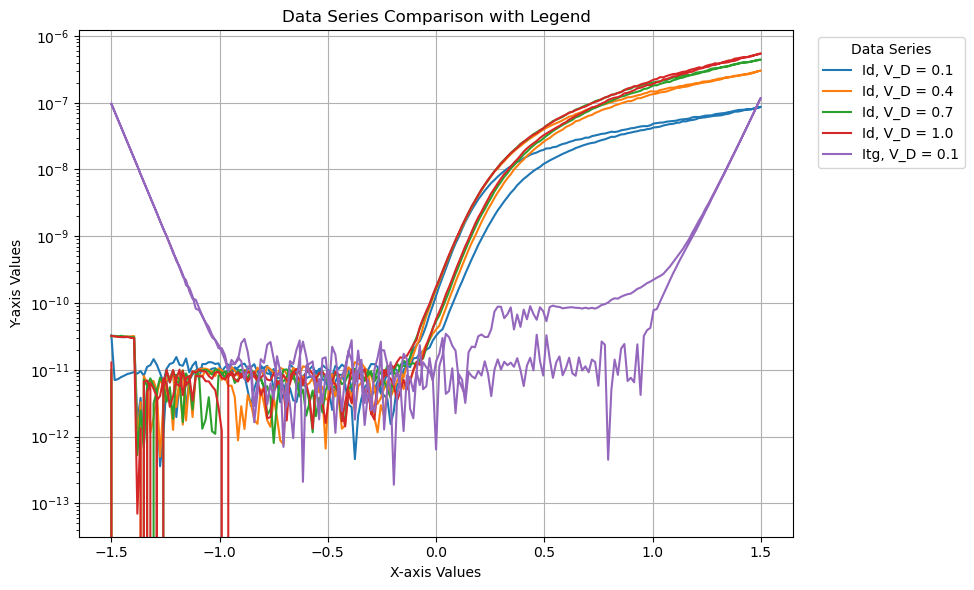

In [15]:
ax = df_new.plot(kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')
plt.yscale('log')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

In [12]:
filtered_df = df_new[df_new['Id, V_D = 0.1'] > 1e-12]
print(filtered_df)

        Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG                                                                 
-1.500   6.487200e-10   1.752000e-09   1.595700e-09   3.439200e-09   
-1.485   6.089600e-10   1.608600e-09   1.635400e-09   2.737200e-09   
-1.470   6.422200e-10   1.425200e-09   1.601000e-09   2.819200e-09   
-1.455   5.897500e-10   1.550000e-09   1.466900e-09   1.886400e-09   
-1.440   6.704700e-10   1.616800e-09   1.714000e-09   1.449300e-09   
...               ...            ...            ...            ...   
-1.440   2.416600e-10   1.053400e-09   2.696700e-09   3.135200e-09   
-1.455   2.176300e-10   1.024500e-09   2.926600e-09   3.000600e-09   
-1.470   2.615400e-10   9.969000e-10   3.086300e-09   2.954300e-09   
-1.485   2.468000e-10   1.051000e-09   3.304200e-09   2.838100e-09   
-1.500   2.553000e-11   1.290800e-09   2.577300e-09   3.269600e-09   

        Itg, V_D = 0.1  Ibg, V_D = 0.1   Vbg  
 VTG                                      

In [16]:
Vtg = filtered_df.index.to_numpy()
Id_sample = filtered_df['Id, V_D = 1.0'].to_numpy()


In [14]:
def find_first_Id_above_threshold(data_list, threshold):
    try:
        return next(index for index, value in enumerate(data_list) if value > threshold)
    except StopIteration:
        return -1

In [17]:
sigma = 5 # Standard deviation of the Gaussian kernel
smoothed_Id = gaussian_filter1d(Id_sample, sigma)

In [18]:
Id_idx_small = find_first_Id_above_threshold(smoothed_Id,1e-10)
print(f'Vtg = {Vtg[Id_idx_small]}, Id = {smoothed_Id[Id_idx_small]}')
Id_idx_large = find_first_Id_above_threshold(smoothed_Id,1e-9)
print(f'Vtg = {Vtg[Id_idx_large]}, Id = {smoothed_Id[Id_idx_large]}')

Vtg = -1.5, Id = 2.2895669659973408e-09
Vtg = -1.5, Id = 2.2895669659973408e-09


c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1315: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


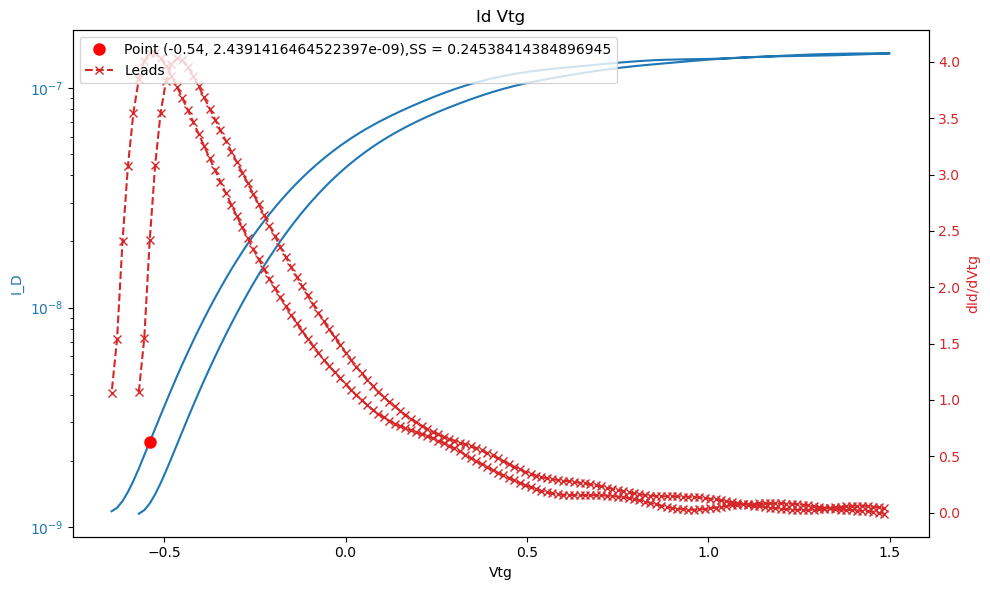

In [ ]:

dIdVg = np.gradient(np.log10(smoothed_Id),Vtg)
max_index = np.nanargmax(dIdVg)



fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the primary axis
color = 'tab:blue'
ax1.set_xlabel('Vtg')
ax1.set_ylabel('I_D', color=color)
ax1.plot(Vtg,smoothed_Id)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.plot(Vtg[max_index], smoothed_Id[max_index], 'o', markersize=8, color='red', label=f'Point ({Vtg[max_index]}, {smoothed_Id[max_index]}),SS = {1/max(dIdVg)}')


# Create a second set of axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset on the secondary axis
color = 'tab:red'
ax2.set_ylabel('dId/dVtg', color=color)
ax2.plot(Vtg,dIdVg, color=color, marker='x', linestyle='--', label='Leads')
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim(-1e9,1e9)

# Add a title and legend
plt.title('Id Vtg')
fig.tight_layout() # Adjusts plot to ensure everything fits

# To combine the legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

In [14]:
SS = 1/max(dIdVg)
Vtg_ss = Vtg[np.nanargmax(dIdVg)]

In [15]:
arr1 = np.array([10, 12, 14, 11, 5])
np.argmax(arr1)

np.int64(2)

In [ ]:
# For sorting files and plotting in origin

for file in file_list:
    match = re.search(r'[^\\]+$', file)
    if match:
        result = match.group(0)
    print(f'{result} started')
    
    Vbg,df = mo.read_csv_IdVtg_double(file)
    df_reshaped = mo.reshape_table_by_VD_double(df)
    df_sorted = mo.reorder_by_VG_double(df_reshaped,Vbg)

    filename =directory_path + '\\sorted\\' + result
    df_sorted.to_csv(filename, index=True)

C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVtg\R11C2-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVtg\R11C3-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVtg\R11C4-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVtg\R11C5-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVtg\R7C10-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVtg\R7C10-T__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVtg\R7C11-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVtg\R7C11-T__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started


In [ ]:
# For SS calculation

SS_list = []
name_list = []
Vtg_upper_list = []
Vtg_lower_list = []
Id_upper_list = []
Id_lower_list = []

for file in file_list:
    
    print(f'SS: {file} started')
    name_list.append(file[52:])
    try:
        Vbg,df = mo.read_csv_IdVtg(file)
    except Exception:
        print("File not processed")
        continue
    

    df_reshaped = mo.reshape_table_by_VD(df)
    df_sorted = mo.reorder_by_VG(df_reshaped,Vbg)
    df_filtered = fs.filter_noise(df_sorted)
    Vtg, smoothed_Id = fs.grab_V_I_0pt1(df_filtered)
    SS,idx_large,idx_small = fs.find_SS(Vtg,smoothed_Id)
    print(SS)
    SS_list.append(SS)
    Vtg_upper_list.append(Vtg[idx_large])
    Vtg_lower_list.append(Vtg[idx_small])
    Id_upper_list.append(smoothed_Id[idx_large])
    Id_lower_list.append(smoothed_Id[idx_small])

    

    


SS: C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C1-T__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -0.54, Id = 1.1398436162350359e-10
Vtg = -0.375, Id = 1.029931320052996e-09
0.16500000000000004
SS: C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C10-T__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -1.5, Id = 4.0064654505296724e-10
Vtg = -0.165, Id = 1.0952025337826155e-09
1.335
SS: C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C11-B__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -0.27, Id = 1.0926292119180503e-10
Vtg = -0.075, Id = 1.114628315576858e-09
0.195
SS: C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C11-T__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -0.75, Id = 1.1852147846706353e-10
Vtg = -0.57, Id = 1.115232547511141e-09
0.18000000000000005
SS: C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C12-B__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -0.27, Id = 1.11366815452839e-10
Vtg = -0.075, Id = 1.1323961665782858e-09
0.195
SS: C:\Users\sophi\Box\MoS2Project\

In [4]:
SS_df = pd.DataFrame(list(zip(name_list, SS_list,Vtg_upper_list,Vtg_lower_list,Id_upper_list,Id_lower_list)), columns=['filename', 'SS','Vtg_high','Vtg_low','Id_high','Id_low'])
SS_df.to_csv(f"{directory_path}\\SS_per_file_1_threshold.csv", index=False)